# Notebook de support pour l'exercice 5 (feuille 5, EDO MAM3, 2020-2021)

Nous considérons le système :

$$ \left\{\begin{array}{l}
\dot x = - y, \\
\dot y = -3y(1-x^2)+x.
\end{array}\right.
$$

Nous avons montré que $^t(x,y)=^t(0,0)$ est l'unique équilibre de ce système et qu'il est asymptotiquement stable, mais pas globalement stable.

Nous cherchons à estimer sur quel domaine cet équilibre est asymptotiquement stable.

## Délimiter la région dans laquelle $\dot V(x,y) <0$

Nous avons $V(x,y) = 4x^2-2xy+y^2$ et :

$$ \dot V = -2x^2 - 4y^2- 6xy^3+ 6x^2y^2$$

Nous utilsons Python. On commence par importer `numpy` et définir la zone $(x,y)$ de travail

In [1]:
import numpy as np

xmin=-3
xmax=3
ymin=-6
ymax=6

Pour évaluer $V$ et $\dot V$ selon $x$ et $y$, nous définissons la grille des $(x,y)$ entre les bornes définies ci dessus

In [2]:
vec_x=np.linspace(xmin,xmax,100)
vec_y=np.linspace(ymin,ymax,100)
X, Y = np.meshgrid(vec_x, vec_y)


On définit les valeurs de $\dot V$ sur cette grille

In [3]:
Vdot=-2*X**2-4*Y**2-6*Y*X**3+6*Y**2*X**2

Et on trace la ligne de niveau $\dot V=0$ (après import de `matplotlib` et suivi par quelques fioritures pour avoir une figure attrayante)

Text(-0.8, -1.5, '$\\dot V<0$')

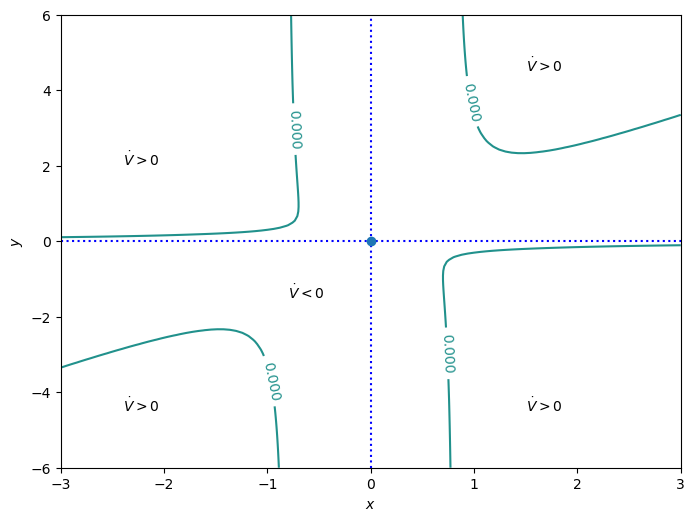

In [4]:
import matplotlib.pyplot as plt

# création de la figure
fig = plt.figure(figsize=(8,6), dpi= 100)
ax = fig.add_subplot()

# ajout du contour Vdot = 0
CS1 = ax.contour(X, Y, Vdot, 0)

# ajout du texte sur le contour
ax.clabel(CS1, inline=1, fontsize=10)

# mise en forme
plt.axis([xmin,xmax,ymin,ymax])
plt.plot([xmin,xmax],[0,0],'b:')
plt.plot([0,0],[ymin,ymax],'b:')
plt.plot(0, 0, 'o')
plt.xlabel('$x$')
plt.ylabel('$y$')

# identification des signes de Vdot
plt.text(-2.4 ,2, '$\dot V>0$')
plt.text(-2.4, -4.5, '$\dot V>0$')
plt.text(1.5, 4.5, '$\dot V>0$')
plt.text(1.5, -4.5, '$\dot V>0$')
plt.text(-.8, -1.5, '$\dot V<0$')

## Tracer quelques courbes de niveau de $V(x,y)$

On réutilise la grille créée plus haut pour tracer quelques courbes de niveau de $V$ comme nous l'avons fait pour $\dot V =0$.

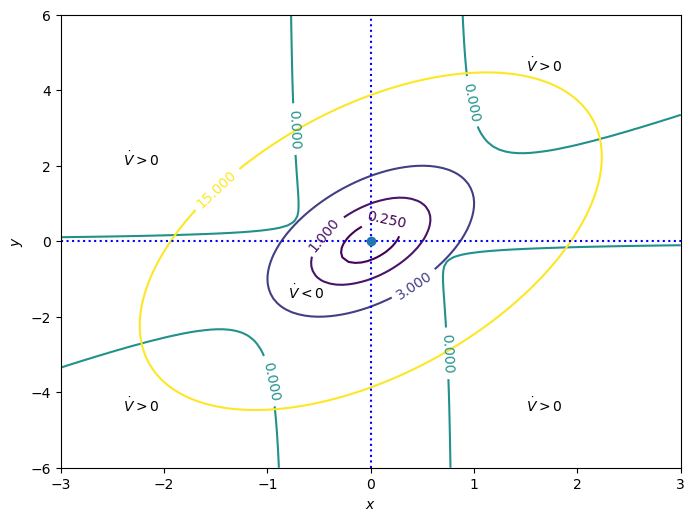

In [5]:
V = 4*X**2-2*X*Y+Y**2

CS2 = ax.contour(X, Y, V, [0.25, 1, 3, 15])
ax.clabel(CS2, inline=1, fontsize=10)

# on réaffiche la figure actualisée
fig

## Tracer quelques solutions

Pour cela, nous utilisons la fonction `odeint` de `scipy`, et nous définissons le système dynamique

In [6]:
from scipy.integrate import odeint

# définition dy systeme à intégrer
def sys_dyn(w,t):
    # on récupère les variables en local
    x = w[0]
    y = w[1]
    
    # on définit les dérivées
    dxdt = -y
    dydt = -3*y*(1-x**2)+x    
    
    # on retourne les dérivées
    return [dxdt,dydt]

nous définissions le temps d'intégration 

In [7]:
tmax = 8

tspan = np.linspace(0, tmax, 5000)

et nous intégrons pour plusieurs conditions initiales, en sauvegardant les solutions dans des vecteurs dédiés

In [8]:
# 1e condition initiale
w01 = [0.5, 0]

# intégration et sauvegarde
w = odeint(sys_dyn, w01, tspan)
x1 = w[:, 0]
y1 = w[:, 1]

# 2e condition initiale
w02 = [1, 0]
w = odeint(sys_dyn, w02, tspan)
x2 = w[:, 0]
y2 = w[:, 1]

# 3e condition initiale
w03 = [2, 0]
w = odeint(sys_dyn, w03, tspan)
x3 = w[:, 0]
y3 = w[:, 1]

# 4e condition initiale
w04 = [2.2, 0]

tmax_unst=1.2
tspan_unst=np.linspace(0,tmax_unst,5000)

w = odeint(sys_dyn, w04, tspan_unst)
x4 = w[:, 0]
y4 = w[:, 1]

nous traçons les différentes solutions sur la figure précédente

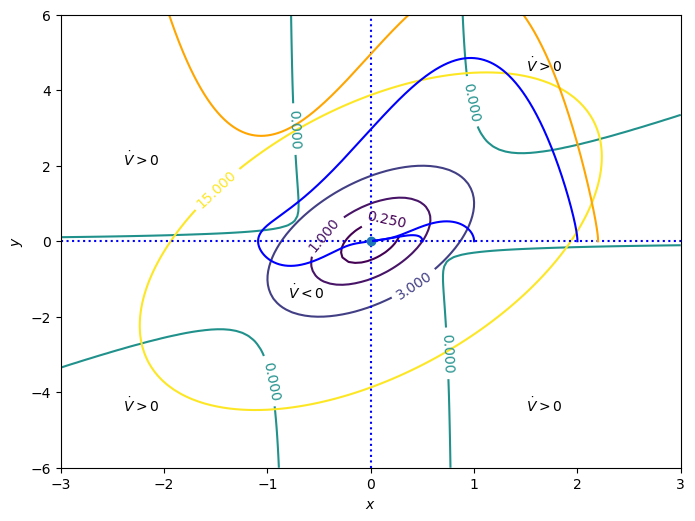

In [9]:
ax.plot(x1, y1, 'b')
ax.plot(x2, y2, 'b')
ax.plot(x3, y3, 'b')
ax.plot(x4, y4, 'orange')

fig

## Simuler le système dynamique en temps inverse

On simule simplement le système entre $t=0$ et $t=-t_{max}$, depuis la condition initiale $(2.02,0)$, et on trace la solution obtenue

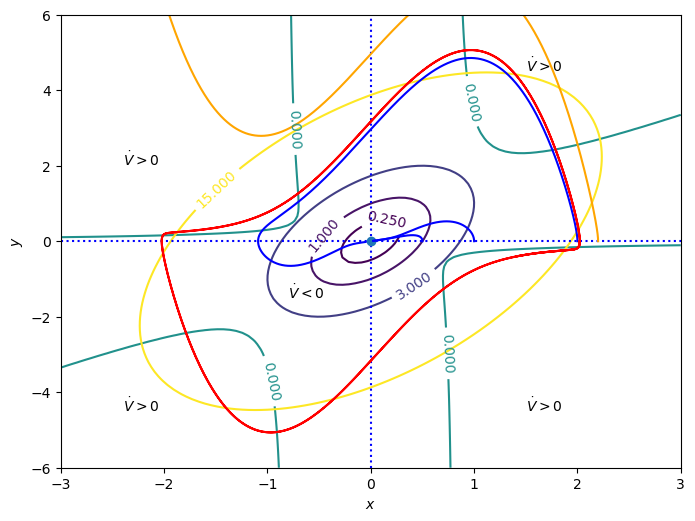

In [10]:
# temps inverse
w05 = [2.02, 0]

tspan_inv=np.linspace(0,-20,5000)

w = odeint(sys_dyn, w05, tspan_inv)
x5 = w[:, 0]
y5 = w[:, 1]

ax.plot(x5, y5, 'r')

fig

La trajectoire rouge représente un cycle limite attractif pour le système dynamique en temps inverse.

Il s'agit donc d'un cycle limite répulsif pour le systeme en temps naturel, cette trajectoire est la courbe qui sépare le bassin d'attraction de l'équilibre $(0,0)$ (intérieur du domaine) de l'ensemble des conditions initiales qui génèrent des trajectoires divergentes.

## Domaine d'attraction maximal : $\dot V <0$ 

D'après la figure, le domaine d'attraction maximal que l'on peut identifier est très proche de $V(x,y) = 3$ ; on peut constater que cette estimation est très loin du véritable d'omaine d'attraction défini par la courbe rouge.

## Tracer $V$ au cours du temps pour différentes conditions initiales

on récupère les trajectoires calculées plus haut, on calcule $V(x,y)$ le long de ces trajectoires et on la trace en fonction du temps.

(0.0, 4.0, 0.0, 50.0)

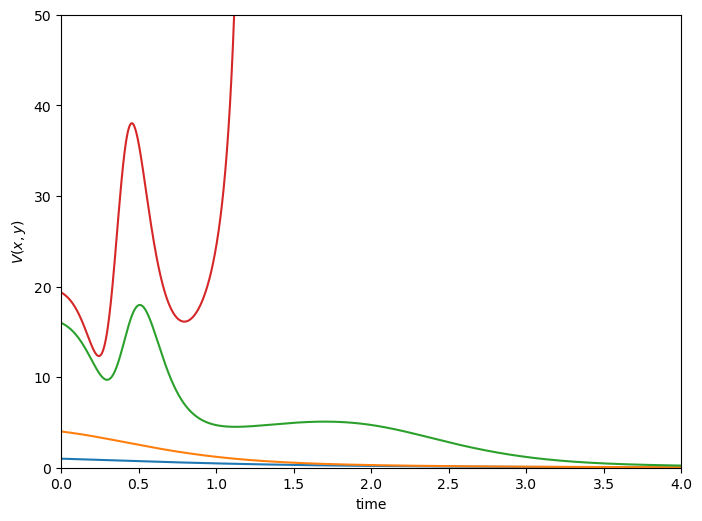

In [11]:
V1=4*x1**2-2*x1*y1+y1**2
V2=4*x2**2-2*x2*y2+y2**2
V3=4*x3**2-2*x3*y3+y3**2
V4=4*x4**2-2*x4*y4+y4**2


fig2 = plt.figure(figsize=(8,6), dpi= 100)
ax2 = fig2.add_subplot()
ax2.plot(tspan, V1)
ax2.plot(tspan, V2)
ax2.plot(tspan, V3)
ax2.plot(tspan_unst, V4)

plt.xlabel("time")
plt.ylabel("$V(x,y)$")
plt.axis([0,4,0,50])

## Visualisation en 3D

On utilise une représentation en 3 dimensions depuis l'option `projection='3d'` que permet l'import de `mplot3d` et la méthode `plot3d` des systèmes d'axes ainsi créés

Text(0.5, 0, '$V(x,y)$')

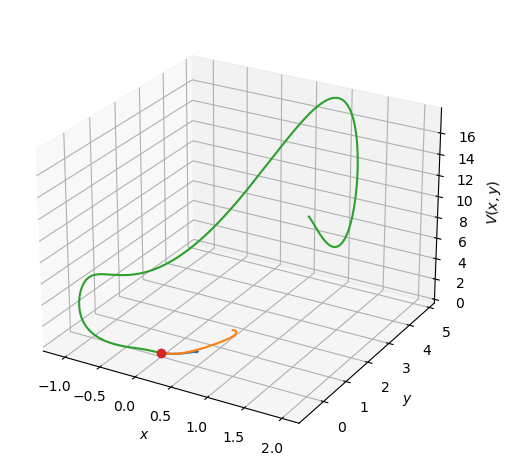

In [19]:
from mpl_toolkits import mplot3d

fig3 = plt.figure(figsize=(8,6), dpi= 100)
ax3 = fig3.add_subplot(projection = "3d")

ax3.plot3D(x1,y1,V1)
ax3.plot3D(x2,y2,V2)
ax3.plot3D(x3,y3,V3)
ax3.plot(0,0,0, 'o')


ax3.view_init(25, -60)

ax3.set_xlabel("$x$")
ax3.set_ylabel("$y$")
ax3.set_zlabel("$V(x,y)$")